In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox
import geopandas as gpd


This section will focus on making the map


In [2]:

bbox = (60, 50, 2, -10)  # (north, south, east, west)

cf =  '["highway"~"motorway|trunk"]'
G = ox.graph_from_bbox(*bbox, network_type="all", simplify=True, custom_filter=cf)


C:\Users\tedmu\AppData\Local\Temp\ipykernel_23708\2263714306.py:6: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead.
  G = ox.graph_from_bbox(*bbox, network_type="all", simplify=True, custom_filter=cf)
c:\Users\tedmu\anaconda3\Lib\site-packages\osmnx\_overpass.py:211: UserWarning: This area is 340 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [20]:
cities = pd.read_csv('city_lon_lat.csv', index_col=0)
stations = pd.read_csv('service_locations.csv')
weights = pd.read_csv('no_of_trips.csv', index_col=0)
weights_total_man = pd.DataFrame(index=weights.index.tolist())
weights_total_man["Total_man"] = 0
for col in weights.columns:
    for row in weights.index:  
        temp_df = weights.loc[row]
        temp_df = temp_df.drop(col, axis=0)
        total_maniplulated = temp_df.sum()
        weights_total_man.loc[row, "Total_man"] = total_maniplulated


merged_df = pd.merge(cities, weights_total_man[['Total_man']], left_index=True, right_index=True, how='left')


merged_df.dropna(inplace=True)
merged_df

,Latitude,Longitude,Total_man
Name,,,
Durham,54.775250,-1.584852,163908.0
Blyth,55.126957,-1.510277,113665.0
Carlisle,54.892473,-2.932931,107323.0
Manchester,53.480759,-2.242631,273174.0
Lancaster,54.044907,-2.799347,199516.0
Warrington,53.390044,-2.596950,165370.0
Liverpool,53.408371,-2.991573,185370.0
Middlesbrough,54.574227,-1.234956,158542.0
Sheffield,53.381129,-1.470085,170248.0


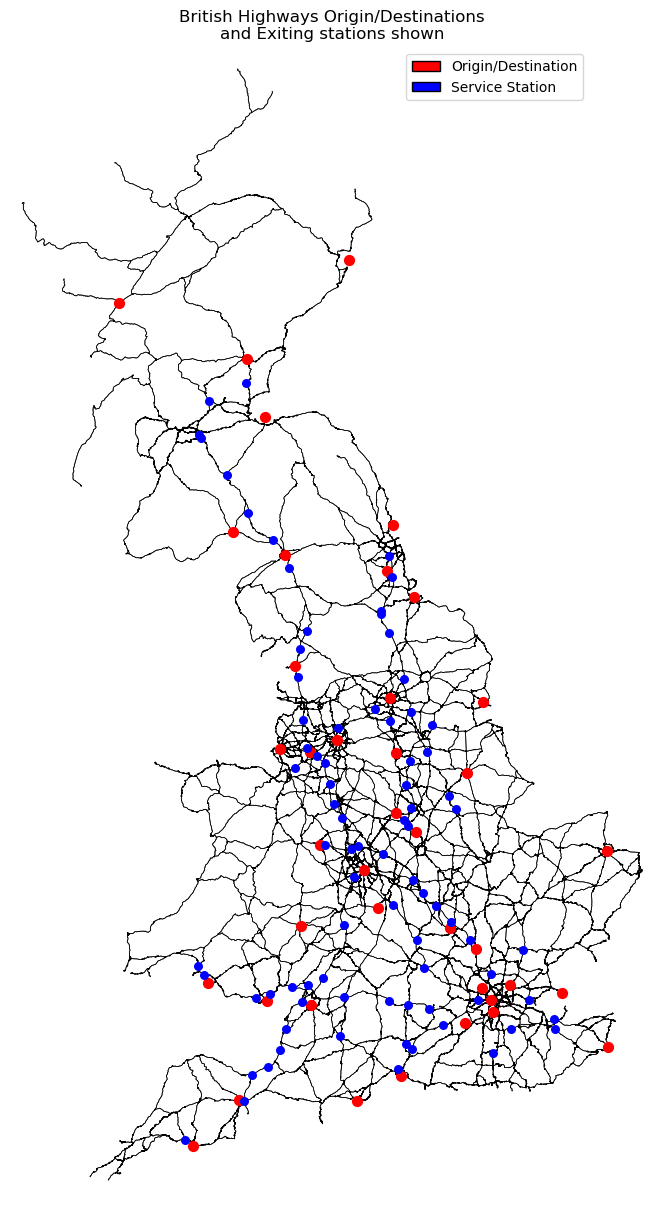

In [9]:
from matplotlib.patches import Patch

fig, ax = ox.plot_graph(G, node_size=1, show=False, close=False, edge_color='black', edge_linewidth=0.5, node_color='black', bgcolor='white', figsize=(10, 15))


for index, city in cities.iterrows():
    ax.scatter(city["Longitude"], city["Latitude"], color = "#ff0000", s=50)

for index, sta in stations.iterrows():
    ax.scatter(sta["Longitude"], sta["Latitude"], color = "#0000ff", s=30)

legend_elements = [Patch(facecolor='#ff0000', edgecolor='black', label='Origin/Destination'),
                   Patch(facecolor='#0000ff', edgecolor='black', label='Service Station')]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.9, 1))

plt.title("British Highways Origin/Destinations\nand Exiting stations shown")
plt.savefig("Photos/Map with cities.png", format="png", dpi=1200)
plt.show()

In [21]:
merged_df

,Latitude,Longitude,Total_man
Name,,,
Durham,54.775250,-1.584852,163908.0
Blyth,55.126957,-1.510277,113665.0
Carlisle,54.892473,-2.932931,107323.0
Manchester,53.480759,-2.242631,273174.0
Lancaster,54.044907,-2.799347,199516.0
Warrington,53.390044,-2.596950,165370.0
Liverpool,53.408371,-2.991573,185370.0
Middlesbrough,54.574227,-1.234956,158542.0
Sheffield,53.381129,-1.470085,170248.0


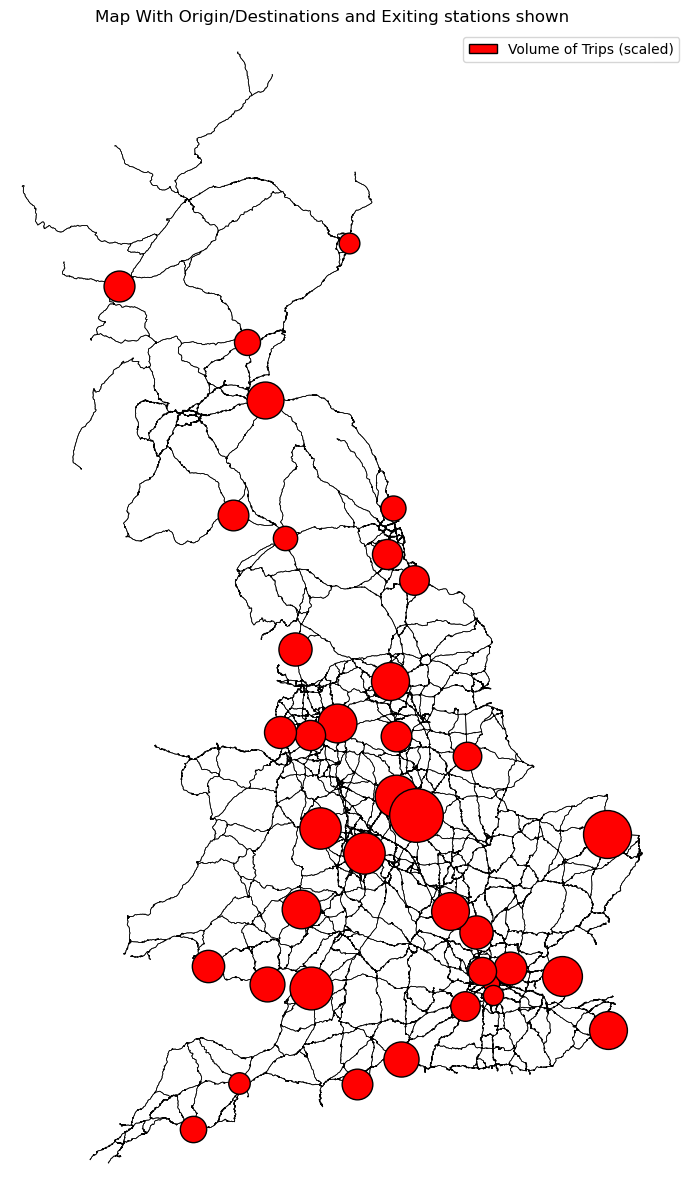

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import osmnx as ox
import pandas as pd


scaling_factor = 9

fig, ax = ox.plot_graph(G, node_size=1, show=False, close=False, edge_color='black', edge_linewidth=0.5, node_color='black', bgcolor='white', figsize=(10, 15))


for index, city in merged_df.iterrows():
    if 'Total_man' in city:  
        
        total_value = city["Total_man"]  
        log_totals = np.log10(total_value)
        if not pd.isnull(total_value):  
           
            ax.scatter(city["Longitude"], city["Latitude"], color='red', edgecolor='black', s=total_value/350)


legend_elements = [Patch(facecolor='#ff0000', edgecolor='black', label='Volume of Trips (scaled)')]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.05, 1))

plt.title("Map With Origin/Destinations and Exiting stations shown")
plt.savefig("Photos/Map Scaled.png", format="png", dpi=1200)

plt.show()


